In [2]:
import os
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import face_recognition
from scipy.spatial import distance

import warnings
warnings.filterwarnings('ignore')

In [1]:
# sysdm.cpl.de,devplt desktop promt

In [3]:
#pip install face_recognition

In [4]:
#pip install dlib


In [7]:
#pip install cmake

In [ ]:
pip install dlib-19.24.99-cp312-cp312-win_amd64.whl

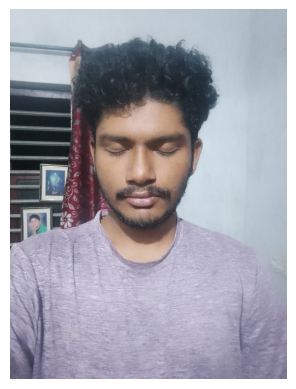

In [19]:
image_path = 'photo_2024-11-15_19-42-13.jpg'
image = Image.open(image_path)
plt.axis('off')
plt.imshow(image)
plt.show()

In [15]:
def highlight_facial_points(image_path):
    # load the image
    image_bgr = cv2.imread(image_path)
    # convert from bgr to rgb
    image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

    # detect faces in the image
    face_locations = face_recognition.face_locations(image_rgb, model='cnn')

    for face_location in face_locations:
        # get facial landmarks
        landmarks = face_recognition.face_landmarks(image_rgb, [face_location])[0]

        # Iterate over the facial landmarks and draw them on the image
        for landmark_type, landmark_points in landmarks.items():
            for (x, y) in landmark_points:
                cv2.circle(image_rgb, (x, y), 3, (0, 255, 0), -1)

    # plot the image
    plt.figure(figsize=(6, 6))
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()

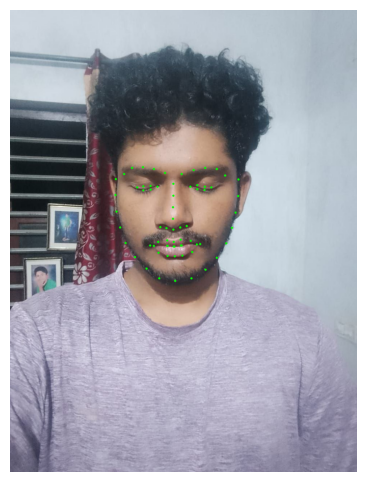

In [20]:
highlight_facial_points(image_path)

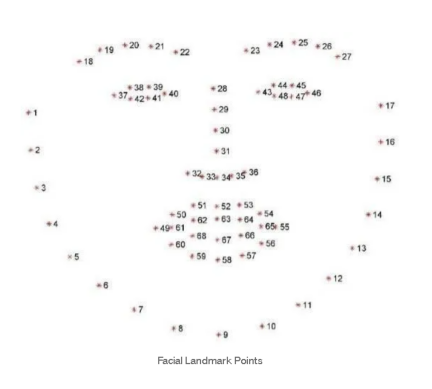

In [18]:
image_pathh = 'facial_landmarks.png'
imagee = Image.open(image_pathh)
plt.axis('off')
plt.imshow(imagee)
plt.show()

In [21]:
# calculate eye aspect ratio
def eye_aspect_ratio(eye):
    A = distance.euclidean(eye[1], eye[5])
    B = distance.euclidean(eye[2], eye[4])
    C = distance.euclidean(eye[0], eye[3])
    ear = (A+B) / (2.0 * C)
    return ear

# calculate mount aspect ratio
def mouth_aspect_ratio(mouth):
    A = distance.euclidean(mouth[2], mouth[10])
    B = distance.euclidean(mouth[4], mouth[8])
    C = distance.euclidean(mouth[0], mouth[6])
    mar = (A+B) / (2.0 * C)
    return mar

In [77]:
def process_image(frame):
    # define thresholds
    EYE_AR_THRESH = 0.25
    MOUTH_AR_THRESH = 0.7

    if frame is None:
        raise ValueError('Image is not found or unable to open')

    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # find all face locations
    face_locations = face_recognition.face_locations(rgb_frame)

    # initiate flags
    eye_flag = mouth_flag = False

    for face_location in face_locations:
        # extract facial landmarks
        landmarks = face_recognition.face_landmarks(rgb_frame, [face_location])[0]
        # extract eye and mouth coordinates
        left_eye = np.array(landmarks['left_eye'])
        right_eye = np.array(landmarks['right_eye'])
        mouth = np.array(landmarks['bottom_lip'])

        # calculate ear and mar
        left_ear = eye_aspect_ratio(left_eye)
        right_ear = eye_aspect_ratio(right_eye)
        ear = (left_ear+right_ear) / 2.0
        mar = mouth_aspect_ratio(mouth)
        
        
         # check if eyes are closed
        if ear < EYE_AR_THRESH:
            eye_flag = True

        # check if yawning
        if mar > MOUTH_AR_THRESH:
            mouth_flag = True

    return eye_flag, mouth_flag

In [59]:
img = cv2.imread(image_path)
process_image(img)

(True, False)

In [78]:
video_path = "test.mp4"
# video_cap = cv2.VideoCapture(0) # for getting frames from the webcam
video_cap = cv2.VideoCapture(video_path)
count = score = 0

while True:
    success, image = video_cap.read()
    if not success:
        break

    image = cv2.resize(image, (400, 450))

    count += 1
    # process every nth frame
    n = 2
    if count % n == 0:
        eye_flag, mouth_flag = process_image(image)
        # if any flag is true, increment the score
        if eye_flag or mouth_flag:
            score += 1
        else:
            score -= 1
            if score < 0:
                score = 0
    
   # write the score values at bottom left of the image
    font = cv2.FONT_HERSHEY_SIMPLEX
    text_x = 10
    text_y = image.shape[0] - 10
    text = f"Score: {score}"
    cv2.putText(image, text, (text_x, text_y), font, 1, (0, 255, 0), 2, cv2.LINE_AA)

    if score >= 4:
        text_x = image.shape[1] - 130
        text_y = 40
        text = "Drowsy"
        cv2.putText(image, text, (text_x, text_y), font, 1, (0, 0, 255), 2, cv2.LINE_AA)

    cv2.imshow('drowsiness detection', image)

    # exit if any key is pressed
    if cv2.waitKey(1) & 0xFF != 255:
        break

video_cap.release()
cv2.destroyAllWindows()

In [65]:
# live detection

In [79]:
import cv2

# Initialize webcam as the video source
video_cap = cv2.VideoCapture(0)  # 0 is usually the default webcam
count = score = 0

# Check if the webcam is accessible
if not video_cap.isOpened():
    print("Error: Unable to access the webcam.")
    exit()

while True:
    success, image = video_cap.read()
    if not success:
        print("Failed to capture frame from webcam.")
        break

    # Resize the frame for consistent processing
    image = cv2.resize(image, (600, 500))

    count += 1
    # Process every nth frame
    n = 5
    if count % n == 0:
        eye_flag, mouth_flag = process_image(image)
        # Update the score based on the flags
        if eye_flag or mouth_flag:
            score += 1
        else:
            score -= 1
            if score < 0:
                score = 0
    # Write the score at the bottom left of the frame
    font = cv2.FONT_HERSHEY_SIMPLEX
    text_x = 10
    text_y = image.shape[0] - 10
    text = f"Score: {score}"
    cv2.putText(image, text, (text_x, text_y), font, 1, (0, 255, 0), 2, cv2.LINE_AA)

    # Display "Drowsy" if the score reaches or exceeds the threshold
    if score >= 5:
        text_x = image.shape[1] - 130
        text_y = 40
        text = "Drowsy"
        cv2.putText(image, text, (text_x, text_y), font, 1, (0, 0, 255), 2, cv2.LINE_AA)

    # Display the frame with annotations
    cv2.imshow('Drowsiness Detection', image)

    # Exit when 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
# Release the webcam and close all OpenCV windows
video_cap.release()
cv2.destroyAllWindows()


In [83]:
# drowsines detection by by sound

In [82]:
import cv2
import os

# Function to play a beep sound
def play_alert_sound():
    # Cross-platform beep sound
    try:
        if os.name == 'nt':  # Windows
            import winsound
            winsound.Beep(1000, 500)  # Frequency: 1000Hz, Duration: 500ms
       
    except Exception as e:
        print(f"Error playing sound: {e}")

# Initialize webcam as the video source
video_cap = cv2.VideoCapture(0)  # 0 is usually the default webcam
count = score = 0

# Check if the webcam is accessible
if not video_cap.isOpened():
    print("Error: Unable to access the webcam.")
    exit()

while True:
    success, image = video_cap.read()
    if not success:
        print("Failed to capture frame from webcam.")
        break

    # Resize the frame for consistent processing
    image = cv2.resize(image, (600, 500))

    count += 1
    # Process every nth frame
    n = 5
    if count % n == 0:
        eye_flag, mouth_flag = process_image(image)
        # Update the score based on the flags
        if eye_flag or mouth_flag:
            score += 1
        else:
            score -= 1
            if score < 0:
                score = 0

    # Write the score at the bottom left of the frame
    font = cv2.FONT_HERSHEY_SIMPLEX
    text_x = 10
    text_y = image.shape[0] - 10
    text = f"Score: {score}"
    cv2.putText(image, text, (text_x, text_y), font, 1, (0, 255, 0), 2, cv2.LINE_AA)

    # Display "Drowsy" if the score reaches or exceeds the threshold
    if score >= 5:
        text_x = image.shape[1] - 130
        text_y = 40
        text = "Drowsy"
        cv2.putText(image, text, (text_x, text_y), font, 1, (0, 0, 255), 2, cv2.LINE_AA)

        # Play alert sound
        play_alert_sound()

    # Display the frame with annotations
    cv2.imshow('Drowsiness Detection', image)

    # Exit when 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the webcam and close all OpenCV windows
video_cap.release()
cv2.destroyAllWindows()
